In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 1) 載入資料集

In [2]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2) 切割訓練集與測試集

In [3]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


## PCA
Parameters:
- n_components: 指定PCA降維後的特徵維度數目。
- whiten: 是否進行白化True/False。白化意指，對降維後的數據的每個特徵進行正規化，即讓方差都為1、平均值為0。默認值為False。
- random_state: 亂數種子，設定常數能夠保證每次PCA結果都一樣。

Attributes:
- explained_variance_： array類型。降維後的各主成分的方差值，主成分方差值越大，則說明這個主成分越重要
- explained_variance_ratio_： array類型。降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個主成分越重要。
- n_components_： int類型。返回保留的特徵個數。

Methods:
- fit(X,y)：把數據放入模型中訓練模型。
- fit_transform(X,[,y])all：訓練模型同時返回降維後的數據。
- transform(X)：對於訓練好的數據降維。

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)

print('PCA方差比: ',pca.explained_variance_ratio_)
print('PCA方差值:',pca.explained_variance_)

PCA方差比:  [0.92390396 0.05371612]
PCA方差值: [4.38034545 0.25467493]


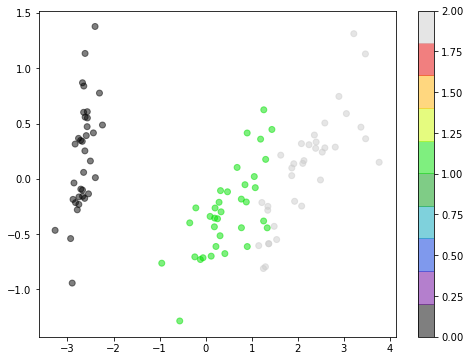

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

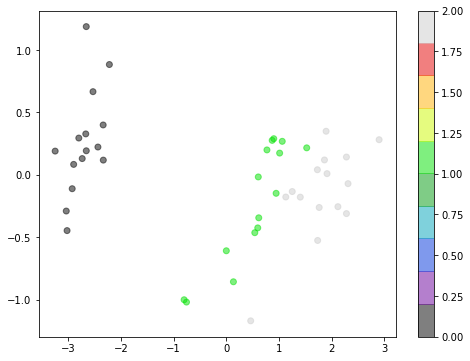

In [6]:
test_reduced = pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(test_reduced[:, 0], test_reduced[:, 1], c=y_test, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

## 其他種類 PCA
- KernelPCA
    - KernelPCA模型類似於非線性支持向量機，使用核技巧處理非線性數據的降維，主要是選擇合適的核函數。

- IncrementalPCA
    - IncrementalPCA模型主要是為了解決計算機內存限制問題。工業上樣本量和維度都是非常大的，如果直接擬合數據，機器性能一般都無法支撐。IncrementalPCA則會將數據分成多個batch，然後對每個batch依次遞增調用partial_fit函數對樣本降維。

- SparsePCA
    - SparsePCA模型相較於普通的PCA區別在於使用了L1正則化，即對非主成分的影響降為0，避免了噪聲對降維的影響。

- MiniBatchSparsePCA
    - MiniBatchSparsePCA模型類似於SparsePCA，不同之處在於MiniBatchSparsePCA模型通過使用一部分樣本特徵和給定的迭代次數進行降維，以此來解決特徵分解過慢的問題。

## t-SNE
t-SNE使用了更複雜的公式來表達高維與低維之間的關係。且能夠允許非線性的轉換。

Parameters:
- n_components: 指定t-SNE降維後的特徵維度數目。
- n_iter: 設定迭代次數。
- random_state: 亂數種子，設定常數能夠保證每次t-SNE結果都一樣。

Attributes:
- explained_variance_： array類型。降維後的各主成分的方差值，主成分方差值越大，則說明這個主成分越重要
- explained_variance_ratio_： array類型。降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個主成分越重要。
- n_components_： int類型。返回保留的特徵個數。

Methods:
- fit(X,y)：把數據放入模型中訓練模型。
- fit_transform(X)：訓練模型同時返回降維後的數據。
- transform(X)：對於訓練好的數據降維。

In [7]:
from sklearn.manifold import TSNE

tsneModel = TSNE(n_components=2, random_state=42,n_iter=1000)
train_reduced = tsneModel.fit_transform(X_train)

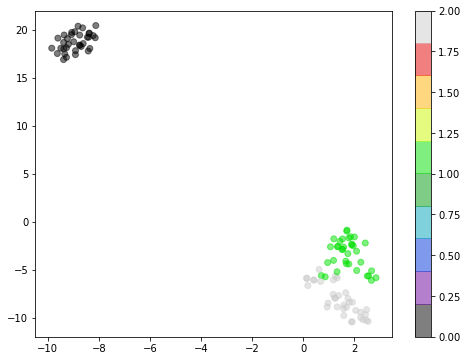

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

###  t-SNE 不適用於新資料

PCA 降維可以適用新資料，可呼叫transform() 函式即可。而 t-SNE 則不行。因為演算法的關係在 scikit-learn 套件中的 t-SNE 演算法並沒有transform() 函式可以呼叫。